In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
import warnings
import plotly.express as px
import plotly.graph_objects as go

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
sns.set_context("talk")

In [31]:
df = pd.read_excel('/content/1730285881-Airbnb_Open_Data.xlsx')
display(df.head())
display(df.shape)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0.0,strict,Private room,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,0.0,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,1.0,flexible,Private room,2005.0,620.0,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,1.0,moderate,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0.0,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


(102599, 26)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [33]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [34]:
df.isnull().sum().sort_values(ascending=False)

,0
license,102597
house_rules,54843
last_review,15893
reviews_per_month,15879
country,532
availability_365,448
minimum_nights,409
host_name,408
review_rate_number,326
calculated_host_listings_count,319


In [35]:
# Get the order of columns based on null counts, sorted in descending order
column_order = df.isnull().sum().sort_values(ascending=False).index

# Iterate through columns in the desired order and display value counts
for column in column_order:
    print(f"Value counts for column: {column}")
    display(df[column].value_counts())
    print("-" * 30)

Value counts for column: license


,count
license,
41662/AL,2


------------------------------
Value counts for column: house_rules


,count
house_rules,
"House Rules 1. Check-in is 4 pm local time. If the unit is ready earlier, weâ€™ll let you know. Check-out is normally 11 am local time, but weâ€™d be happy to extend it as long as we donâ€™t have a cleaning scheduled. Just let us know. 2. All bookings require a security deposit of at least $300, which will be refunded within 7 days of your check-out. 3. For security measures we require all guests to provide proof of identification through ID verification on our own website. In order to check in we'll need a photo of your ID. 4. Our cancellation policy is as shown on our ad and defined by the site you are booking through. 5. Donâ€™t let $300 go up in smoke. There's no smoking allowed in any Flatbook and a $300 fine for breaking this rule. 6. Unfortunately we donâ€™t allow pets in any of our apartments. 7. Unless youâ€™re staying in one of our specialty apartments, we donâ€™t allow parties or excessive noise. 8. If we find the place very messy, we have to charge an extra $40 for every extra hour o",904
"Please remember that this is a residential building. The building rules, apartment occupancy restrictions and the year-round tenants must be respected.",881
No Smoking No Pets,814
"Please remember that this is a residential building. The building rules, apartment occupancy restrictions and the year-round tenants must be respected. Parties, pets and smoking are not allowed under any circumstances and incur significant fees.",552
No Smoking,338
...,...
"- The price is based on double occupancy. $50. per person per night. - Check prices with host before booking - The price is based on double occupancy $300 per person per week. And $1000 monthly per person. - Single room $64 per night. Weekly, $350. Monthly $1213",1
- Quiet time after 24,1
15 guest maximum. Smoking isn't permitted and unfortunately neither are pets. Sorry. Quiet hours 9p-8a.,1


------------------------------
Value counts for column: last_review


,count
last_review,
2019-06-23,2443
2019-06-30,2232
2019-07-01,2218
2019-06-24,1510
2019-07-07,1151
...,...
2016-02-04,1
2015-07-08,1
2016-02-18,1


------------------------------
Value counts for column: reviews_per_month


,count
reviews_per_month,
0.03,1666
0.05,1490
1.00,1455
0.04,1270
0.09,1269
...,...
11.58,1
7.80,1
7.73,1


------------------------------
Value counts for column: country


,count
country,
United States,102067


------------------------------
Value counts for column: availability_365


,count
availability_365,
0.0,23544
365.0,2500
364.0,1168
89.0,751
1.0,734
...,...
366.0,33
-6.0,32
391.0,30


------------------------------
Value counts for column: minimum_nights


,count
minimum_nights,
1.0,25421
2.0,23604
3.0,16113
30.0,11653
4.0,6625
...,...
-125.0,1
125.0,1
34.0,1


------------------------------
Value counts for column: host_name


,count
host_name,
Michael,881
David,764
John,581
Alex,546
Sonder (NYC),516
...,...
Asshur,1
Lucienne,1
Natalie And Dan,1


------------------------------
Value counts for column: review_rate_number


,count
review_rate_number,
5.0,23369
4.0,23329
3.0,23265
2.0,23098
1.0,9212


------------------------------
Value counts for column: calculated_host_listings_count


,count
calculated_host_listings_count,
1.0,63429
2.0,14445
3.0,6577
4.0,3552
5.0,1995
...,...
86.0,21
22.0,20
55.0,15


------------------------------
Value counts for column: host_identity_verified


,count
host_identity_verified,
unconfirmed,51200
verified,51110


------------------------------
Value counts for column: service_fee


,count
service_fee,
41.0,526
216.0,524
81.0,519
177.0,518
57.0,513
...,...
73.0,386
58.0,384
67.0,381


------------------------------
Value counts for column: name


,count
name,
Home away from home,33
Hillside Hotel,30
Water View King Bed Hotel Room,30
Brooklyn Apartment,27
New york Multi-unit building,27
...,...
Modern Super Clean Midtown Apt in the Heart of NYC,1
For all classical lover's 4,1
"""San-ParaÃ­so"" 80s curated Retro 3 Bedroom LES Pad",1


------------------------------
Value counts for column: price


,count
price,
206.0,137
1056.0,132
481.0,129
833.0,128
573.0,127
...,...
369.0,58
923.0,57
786.0,54


------------------------------
Value counts for column: construction_year


,count
construction_year,
2014.0,5243
2008.0,5225
2006.0,5223
2019.0,5201
2009.0,5166
2020.0,5158
2010.0,5155
2022.0,5134
2005.0,5132


------------------------------
Value counts for column: number_of_reviews


,count
number_of_reviews,
0.0,15734
1.0,10408
2.0,7175
3.0,5375
4.0,4151
...,...
1010.0,1
446.0,1
490.0,1


------------------------------
Value counts for column: country_code


,count
country_code,
US,102468


------------------------------
Value counts for column: instant_bookable


,count
instant_bookable,
0.0,51474
1.0,51020


------------------------------
Value counts for column: cancellation_policy


,count
cancellation_policy,
moderate,34343
strict,34106
flexible,34074


------------------------------
Value counts for column: neighbourhood_group


,count
neighbourhood_group,
Manhattan,43792
Brooklyn,41842
Queens,13267
Bronx,2712
Staten Island,955
brookln,1
manhatan,1


------------------------------
Value counts for column: neighbourhood


,count
neighbourhood,
Bedford-Stuyvesant,7937
Williamsburg,7775
Harlem,5466
Bushwick,4982
Hell's Kitchen,3965
...,...
Rossville,3
Gerritsen Beach,3
Fort Wadsworth,2


------------------------------
Value counts for column: long


,count
long,
-73.99371,44
-73.95350,40
-73.94791,37
-73.95427,37
-73.95677,34
...,...
-73.86037,1
-73.82992,1
-73.84460,1


------------------------------
Value counts for column: lat


,count
lat,
40.76411,36
40.71813,32
40.76125,28
40.73756,27
40.76106,25
...,...
40.73244,1
40.71740,1
40.85389,1


------------------------------
Value counts for column: id


,count
id,
35528923,2
35529475,2
35530027,2
35530580,2
35531132,2
...,...
19802733,1
19802180,1
19801628,1


------------------------------
Value counts for column: host_id


,count
host_id,
862834181,2
70834921655,2
65519636966,2
635525656,2
32812127929,2
...,...
32863385446,1
6167807449,1
13606903466,1


------------------------------
Value counts for column: room_type


,count
room_type,
Entire home/apt,53701
Private room,46556
Shared room,2226
Hotel room,116


------------------------------


In [36]:
# 1️⃣ Drop irrelevant or almost-empty columns
# df.drop(columns=['license'], inplace=True)  # Only 2 valid entries - already dropped

# 2️⃣ Fill missing values
df['reviews_per_month'].fillna(0, inplace=True)
df['host_identity_verified'].fillna('unverified', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['country_code'].fillna('UNK', inplace=True)
df['house_rules'].fillna('No rules specified', inplace=True)

# 3️⃣ Clean availability (shouldn’t exceed 365)
df['availability_365'] = df['availability_365'].clip(upper=365)

# 4️⃣ Convert boolean-like column
df['instant_bookable'] = df['instant_bookable'].fillna(0).astype(int)

# 5️⃣ Drop duplicates
df.drop_duplicates(inplace=True)

# 6️⃣ Handle missing prices
df = df[df['price'].notnull()]

# 7️⃣ Re-check missing data
df.isnull().sum().sort_values(ascending=False)

,0
license,101809
last_review,15806
availability_365,448
host_name,401
minimum_nights,400
review_rate_number,319
calculated_host_listings_count,319
name,267
service_fee,239
construction_year,210


In [37]:
selected_columns = [
    'availability_365',
    'host_name',
    'minimum_nights',
    'review_rate_number',
    'calculated_host_listings_count',
    'name',
    'service_fee',
    'construction_year',
    'number_of_reviews',
    'cancellation_policy',
    'neighbourhood_group',
    'neighbourhood'
]

for column in selected_columns:
    print(f"Value counts for column: {column}")
    display(df[column].value_counts(dropna=False))
    print("-" * 30)

Value counts for column: availability_365


,count
availability_365,
0.0,23385
365.0,5224
364.0,1158
89.0,744
1.0,731
...,...
-2.0,42
-4.0,41
-10.0,37


------------------------------
Value counts for column: host_name


,count
host_name,
Michael,874
David,760
John,573
Alex,543
Sonder (NYC),516
...,...
Aisha & Sherwin,1
Yahighnes,1
KiM,1


------------------------------
Value counts for column: minimum_nights


,count
minimum_nights,
1.0,25241
2.0,23442
3.0,16004
30.0,11512
4.0,6592
...,...
-125.0,1
125.0,1
34.0,1


------------------------------
Value counts for column: review_rate_number


,count
review_rate_number,
5.0,23190
4.0,23154
3.0,23076
2.0,22917
1.0,9155
NaN,319


------------------------------
Value counts for column: calculated_host_listings_count


,count
calculated_host_listings_count,
1.0,62978
2.0,14352
3.0,6522
4.0,3522
5.0,1972
...,...
22.0,20
86.0,20
55.0,15


------------------------------
Value counts for column: name


,count
name,
NaN,267
Home away from home,32
Hillside Hotel,30
Water View King Bed Hotel Room,29
New york Multi-unit building,27
...,...
Large Furnished Room Near B'way,1
Large Cozy 1 BR Apartment In Midtown East,1
Entire Apt: Spacious Studio/Loft by central park,1


------------------------------
Value counts for column: service_fee


,count
service_fee,
216.0,523
41.0,517
81.0,514
177.0,513
57.0,509
...,...
58.0,378
67.0,377
10.0,264


------------------------------
Value counts for column: construction_year


,count
construction_year,
2014.0,5207
2008.0,5183
2006.0,5175
2019.0,5160
2009.0,5132
2020.0,5122
2010.0,5119
2022.0,5098
2005.0,5090


------------------------------
Value counts for column: number_of_reviews


,count
number_of_reviews,
0.0,15647
1.0,10305
2.0,7108
3.0,5326
4.0,4118
...,...
698.0,1
399.0,1
455.0,1


------------------------------
Value counts for column: cancellation_policy


,count
cancellation_policy,
moderate,34085
strict,33847
flexible,33808
NaN,71


------------------------------
Value counts for column: neighbourhood_group


,count
neighbourhood_group,
Manhattan,43447
Brooklyn,41537
Queens,13164
Bronx,2687
Staten Island,946
NaN,28
manhatan,1
brookln,1


------------------------------
Value counts for column: neighbourhood


,count
neighbourhood,
Bedford-Stuyvesant,7882
Williamsburg,7713
Harlem,5431
Bushwick,4940
Hell's Kitchen,3945
...,...
Rossville,3
Gerritsen Beach,3
Fort Wadsworth,2


------------------------------


In [38]:
# Fix negative values
numeric_cols = ['minimum_nights', 'availability_365', 'number_of_reviews']
for col in numeric_cols:
    if col in df.columns:
        df.loc[df[col] < 0, col] = abs(df[col])  # make all positive

# Handle missing values (only mentioned columns)
fill_values = {
    'name': 'Unknown Property',
    'service_fee': df['service_fee'].median(),
    'construction_year': df['construction_year'].median(),
    'cancellation_policy': df['cancellation_policy'].mode()[0]
}

for col, val in fill_values.items():
    if col in df.columns:
        df[col].fillna(val, inplace=True)

# Fix the last_review column properly
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
# Keep NaT for missing dates (no 1900 placeholder)

# Cap unrealistic values for availability (above 365)
if 'availability_365' in df.columns:
    df['availability_365'] = df['availability_365'].clip(lower=0, upper=365)

In [39]:
for column in df.columns:
    print(f"Value counts for column: {column}")
    display(df[column].value_counts(dropna=False))
    print("-" * 30)

Value counts for column: id


,count
id,
57367417,1
1001254,1
1002102,1
57355267,1
57354714,1
...,...
1005202,1
1004650,1
1004098,1


------------------------------
Value counts for column: name


,count
name,
Unknown Property,267
Home away from home,32
Hillside Hotel,30
Water View King Bed Hotel Room,29
New york Multi-unit building,27
...,...
Large Furnished Room Near B'way,1
Large Cozy 1 BR Apartment In Midtown East,1
Entire Apt: Spacious Studio/Loft by central park,1


------------------------------
Value counts for column: host_id


,count
host_id,
29531702698,2
80290115223,1
17131759524,1
55817971561,1
57948967887,1
...,...
52383618883,1
9289525161,1
58309114312,1


------------------------------
Value counts for column: host_identity_verified


,count
host_identity_verified,
unconfirmed,50831
verified,50695
unverified,285


------------------------------
Value counts for column: host_name


,count
host_name,
Michael,874
David,760
John,573
Alex,543
Sonder (NYC),516
...,...
Aisha & Sherwin,1
Yahighnes,1
KiM,1


------------------------------
Value counts for column: neighbourhood_group


,count
neighbourhood_group,
Manhattan,43447
Brooklyn,41537
Queens,13164
Bronx,2687
Staten Island,946
NaN,28
manhatan,1
brookln,1


------------------------------
Value counts for column: neighbourhood


,count
neighbourhood,
Bedford-Stuyvesant,7882
Williamsburg,7713
Harlem,5431
Bushwick,4940
Hell's Kitchen,3945
...,...
Rossville,3
Gerritsen Beach,3
Fort Wadsworth,2


------------------------------
Value counts for column: lat


,count
lat,
40.76411,36
40.71813,32
40.76125,27
40.73756,26
40.71353,25
...,...
40.58209,1
40.59505,1
40.71667,1


------------------------------
Value counts for column: long


,count
long,
-73.99371,44
-73.95350,38
-73.94791,37
-73.95427,37
-73.95677,34
...,...
-73.79474,1
-73.84950,1
-73.82697,1


------------------------------
Value counts for column: country


,count
country,
United States,101284
Unknown,527


------------------------------
Value counts for column: country_code


,count
country_code,
US,101685
UNK,126


------------------------------
Value counts for column: instant_bookable


,count
instant_bookable,
0,51166
1,50645


------------------------------
Value counts for column: cancellation_policy


,count
cancellation_policy,
moderate,34156
strict,33847
flexible,33808


------------------------------
Value counts for column: room_type


,count
room_type,
Entire home/apt,53296
Private room,46200
Shared room,2200
Hotel room,115


------------------------------
Value counts for column: construction_year


,count
construction_year,
2012.0,5299
2014.0,5207
2008.0,5183
2006.0,5175
2019.0,5160
2009.0,5132
2020.0,5122
2010.0,5119
2022.0,5098


------------------------------
Value counts for column: price


,count
price,
206.0,135
1056.0,131
481.0,129
833.0,127
573.0,126
...,...
369.0,57
923.0,57
786.0,54


------------------------------
Value counts for column: service_fee


,count
service_fee,
125.0,668
216.0,523
41.0,517
81.0,514
177.0,513
...,...
73.0,382
58.0,378
67.0,377


------------------------------
Value counts for column: minimum_nights


,count
minimum_nights,
1.0,25242
2.0,23443
3.0,16005
30.0,11512
4.0,6592
...,...
364.0,1
119.0,1
34.0,1


------------------------------
Value counts for column: number_of_reviews


,count
number_of_reviews,
0.0,15647
1.0,10305
2.0,7108
3.0,5326
4.0,4118
...,...
698.0,1
399.0,1
455.0,1


------------------------------
Value counts for column: last_review


,count
last_review,
NaT,15806
2019-06-23,2433
2019-06-30,2216
2019-07-01,2199
2019-06-24,1503
...,...
2015-11-20,1
2020-05-03,1
2020-05-02,1


------------------------------
Value counts for column: reviews_per_month


,count
reviews_per_month,
0.00,15791
0.03,1664
0.05,1487
1.00,1454
0.04,1260
...,...
26.11,1
7.80,1
7.73,1


------------------------------
Value counts for column: review_rate_number


,count
review_rate_number,
5.0,23190
4.0,23154
3.0,23076
2.0,22917
1.0,9155
NaN,319


------------------------------
Value counts for column: calculated_host_listings_count


,count
calculated_host_listings_count,
1.0,62978
2.0,14352
3.0,6522
4.0,3522
5.0,1972
...,...
22.0,20
86.0,20
55.0,15


------------------------------
Value counts for column: availability_365


,count
availability_365,
0.0,23385
365.0,5224
364.0,1158
1.0,776
89.0,744
...,...
210.0,90
181.0,88
202.0,85


------------------------------
Value counts for column: house_rules


,count
house_rules,
No rules specified,54395
"House Rules 1. Check-in is 4 pm local time. If the unit is ready earlier, weâ€™ll let you know. Check-out is normally 11 am local time, but weâ€™d be happy to extend it as long as we donâ€™t have a cleaning scheduled. Just let us know. 2. All bookings require a security deposit of at least $300, which will be refunded within 7 days of your check-out. 3. For security measures we require all guests to provide proof of identification through ID verification on our own website. In order to check in we'll need a photo of your ID. 4. Our cancellation policy is as shown on our ad and defined by the site you are booking through. 5. Donâ€™t let $300 go up in smoke. There's no smoking allowed in any Flatbook and a $300 fine for breaking this rule. 6. Unfortunately we donâ€™t allow pets in any of our apartments. 7. Unless youâ€™re staying in one of our specialty apartments, we donâ€™t allow parties or excessive noise. 8. If we find the place very messy, we have to charge an extra $40 for every extra hour o",900
"Please remember that this is a residential building. The building rules, apartment occupancy restrictions and the year-round tenants must be respected.",878
No Smoking No Pets,802
"Please remember that this is a residential building. The building rules, apartment occupancy restrictions and the year-round tenants must be respected. Parties, pets and smoking are not allowed under any circumstances and incur significant fees.",551
...,...
"- The price is based on double occupancy. $50. per person per night. - Check prices with host before booking - The price is based on double occupancy $300 per person per week. And $1000 monthly per person. - Single room $64 per night. Weekly, $350. Monthly $1213",1
- Quiet time after 24,1
15 guest maximum. Smoking isn't permitted and unfortunately neither are pets. Sorry. Quiet hours 9p-8a.,1


------------------------------
Value counts for column: license


,count
license,
NaN,101809
41662/AL,2


------------------------------


In [40]:
# Fill only columns needed for your questions
df['neighbourhood_group'].fillna(df['neighbourhood_group'].mode()[0], inplace=True)
df['neighbourhood'].fillna(df['neighbourhood'].mode()[0], inplace=True)
df['host_name'].fillna('Anonymous Host', inplace=True)
df['review_rate_number'].fillna(df['review_rate_number'].median(), inplace=True)
df['availability_365'].fillna(df['availability_365'].median(), inplace=True)
df['calculated_host_listings_count'].fillna(df['calculated_host_listings_count'].median(), inplace=True)

# Drop rows where coordinates are missing (very few)
df.dropna(subset=['lat', 'long'], inplace=True)

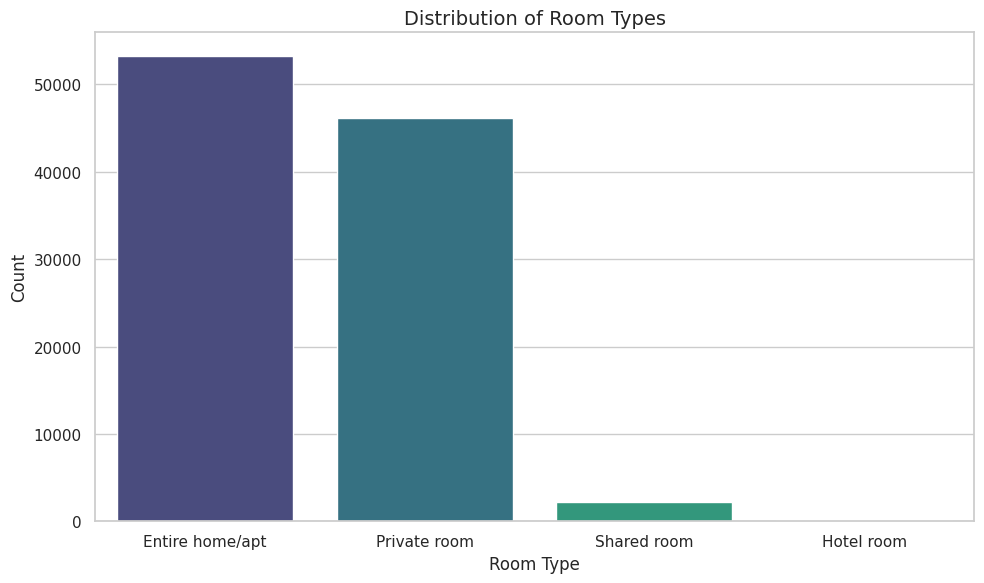

In [42]:
import os

# Create folder for plots
os.makedirs("plots", exist_ok=True)

# Set visualization theme
sns.set_theme(style="whitegrid", palette="coolwarm")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12

# ==============================================
# Q1. Distribution of Room Types
# ==============================================
plt.figure()
sns.countplot(data=df, x='room_type', order=df['room_type'].value_counts().index, palette="viridis")
plt.title("Distribution of Room Types")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("plots/q1_room_type.png", dpi=300, bbox_inches='tight')
plt.show()

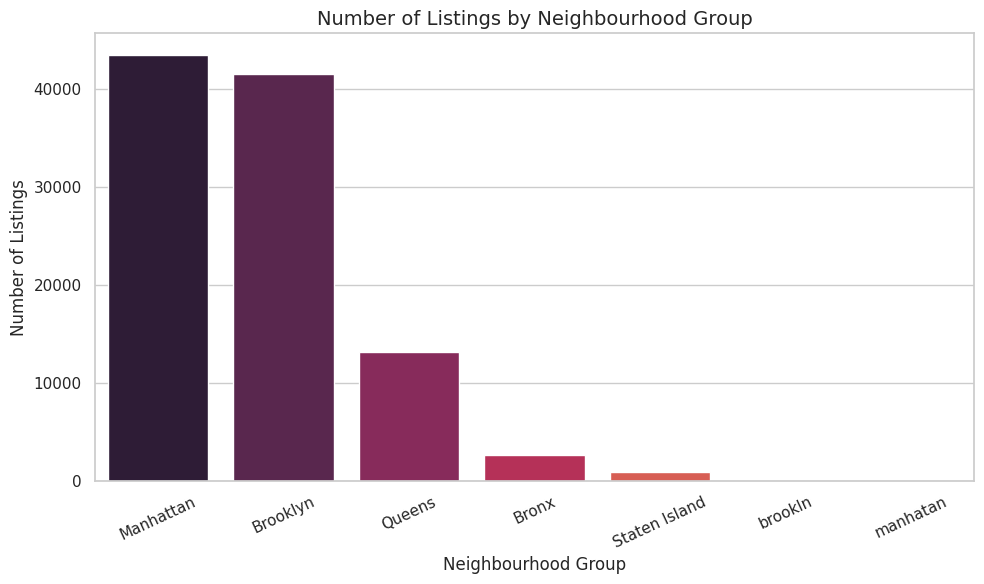

In [44]:
# ==============================================
# Q2. Listings by Neighbourhood Group
# ==============================================
plt.figure()
sns.countplot(data=df, x='neighbourhood_group', order=df['neighbourhood_group'].value_counts().index, palette="rocket")
plt.title("Number of Listings by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Number of Listings")
plt.xticks(rotation=25)
plt.tight_layout()
plt.savefig("plots/q2_neighbourhood_group.png", dpi=300, bbox_inches='tight')
plt.show()

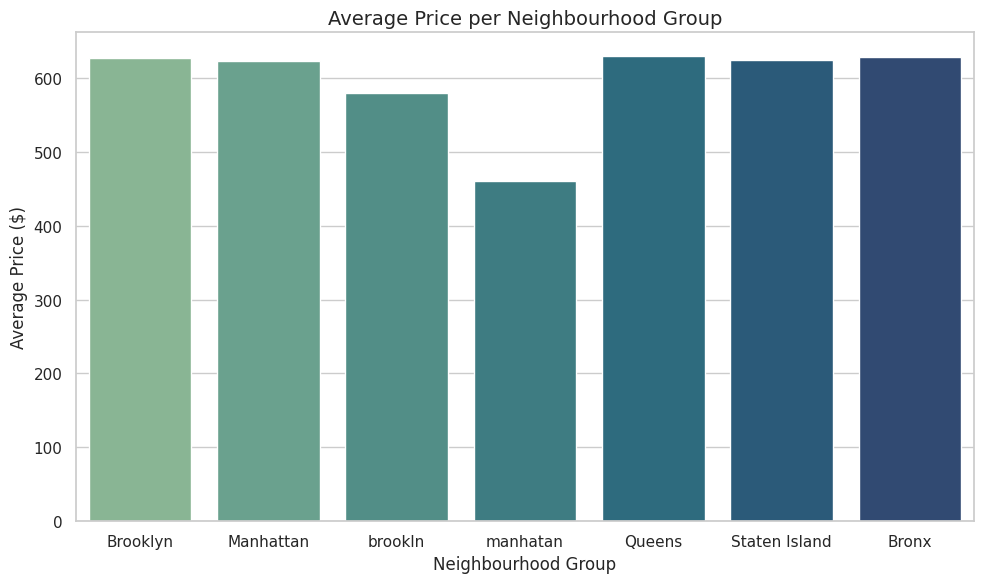

In [45]:
# ==============================================
# Q3. Average Price per Neighbourhood Group
# ==============================================
plt.figure()
sns.barplot(data=df, x='neighbourhood_group', y='price', estimator='mean', ci=None, palette="crest")
plt.title("Average Price per Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Average Price ($)")
plt.tight_layout()
plt.savefig("plots/q3_avg_price.png", dpi=300, bbox_inches='tight')
plt.show()

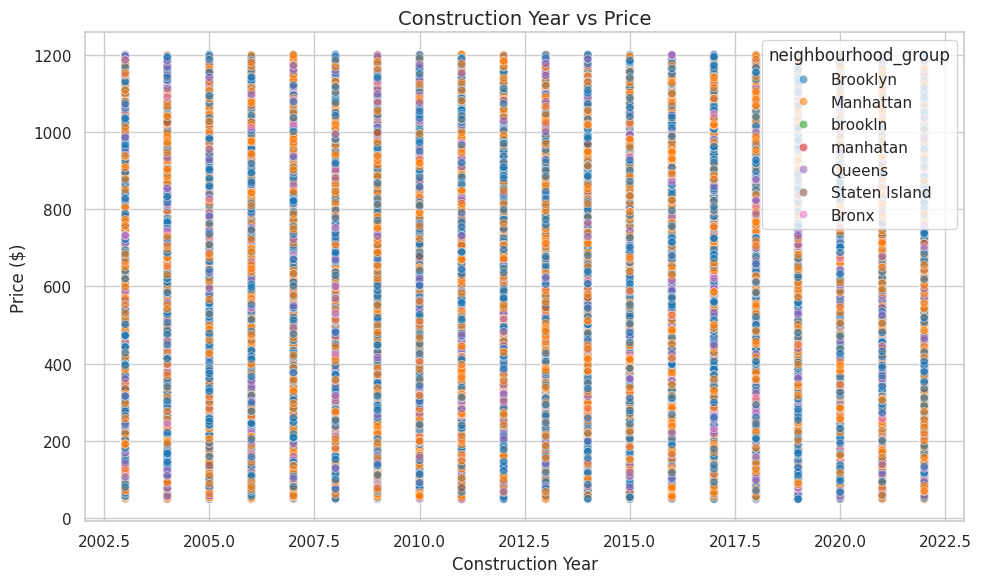

In [54]:
# ==============================================
# Q4. Relationship Between Construction Year and Price
# ==============================================
plt.figure()
sns.scatterplot(data=df, x='construction_year', y='price', hue='neighbourhood_group', alpha=0.6, palette="tab10")
plt.title("Construction Year vs Price")
plt.xlabel("Construction Year")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.savefig("plots/q4_construction_vs_price.png", dpi=300, bbox_inches='tight')
plt.show()

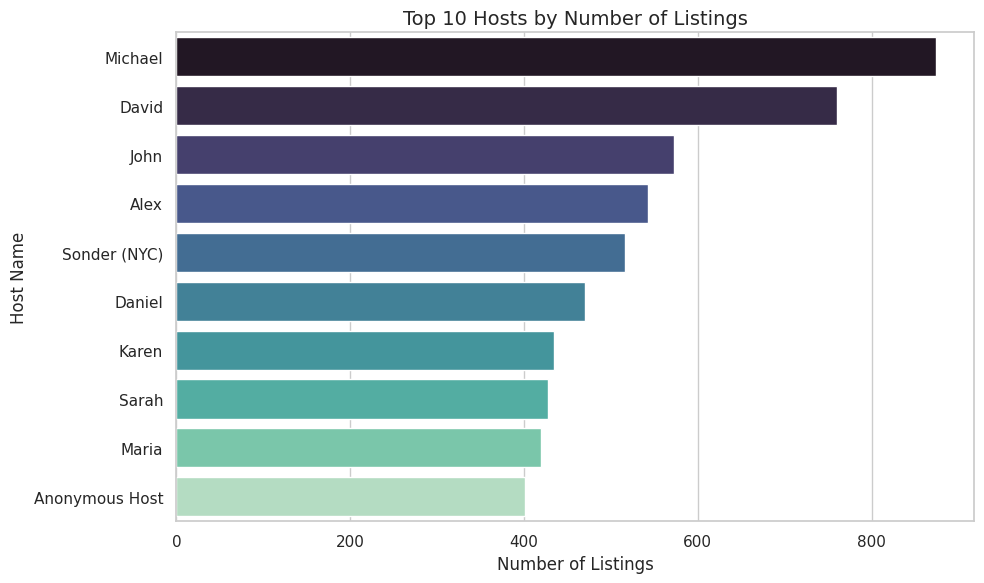

In [48]:
# ==============================================
# Q5. Top 10 Hosts by Number of Listings
# ==============================================
plt.figure()
top_hosts = df['host_name'].value_counts().head(10)
sns.barplot(x=top_hosts.values, y=top_hosts.index, palette="mako")
plt.title("Top 10 Hosts by Number of Listings")
plt.xlabel("Number of Listings")
plt.ylabel("Host Name")
plt.tight_layout()
plt.savefig("plots/q5_top_hosts.png", dpi=300, bbox_inches='tight')
plt.show()

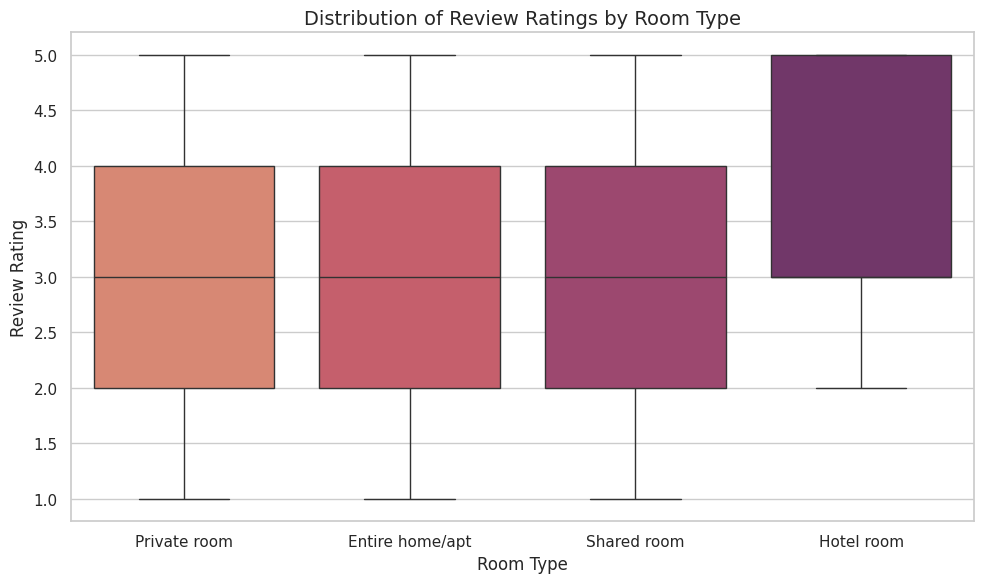

In [49]:
# ==============================================
# Q6. Review Ratings by Room Type
# ==============================================
plt.figure()
sns.boxplot(data=df, x='room_type', y='review_rate_number', palette="flare")
plt.title("Distribution of Review Ratings by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Review Rating")
plt.tight_layout()
plt.savefig("plots/q6_review_ratings_roomtype.png", dpi=300, bbox_inches='tight')
plt.show()

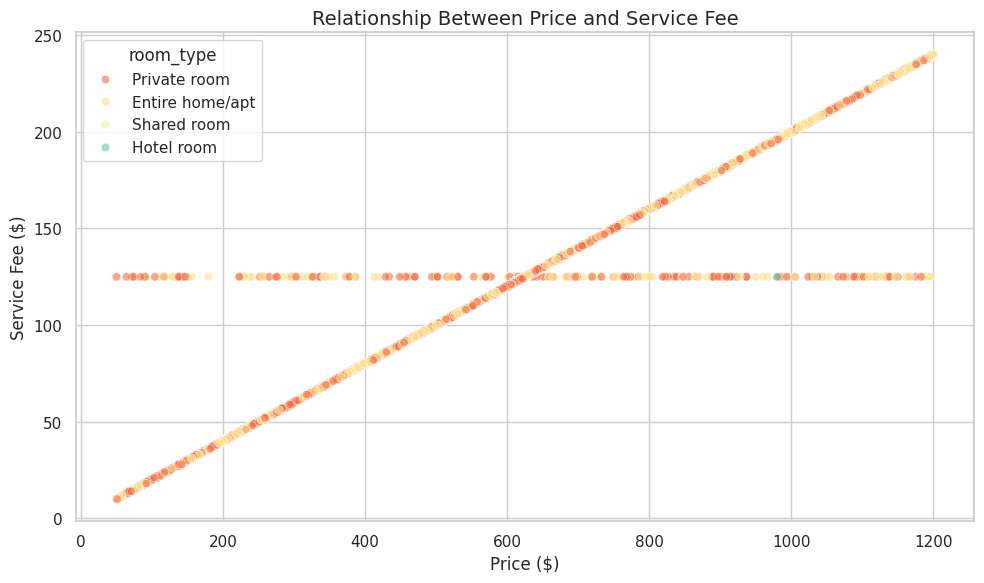

In [50]:
# ==============================================
# Q7. Price vs Service Fee Relationship
# ==============================================
plt.figure()
sns.scatterplot(data=df, x='price', y='service_fee', hue='room_type', alpha=0.6, palette="Spectral")
plt.title("Relationship Between Price and Service Fee")
plt.xlabel("Price ($)")
plt.ylabel("Service Fee ($)")
plt.tight_layout()
plt.savefig("plots/q7_price_service_fee.png", dpi=300, bbox_inches='tight')
plt.show()

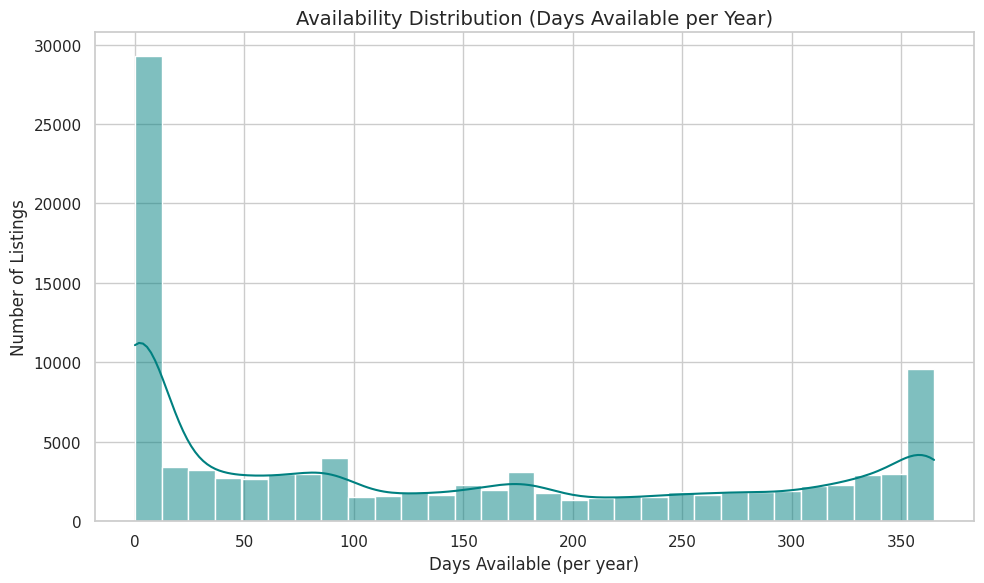

In [51]:
# ==============================================
# Q8. Availability Distribution
# ==============================================
plt.figure()
sns.histplot(df['availability_365'], bins=30, color='teal', kde=True)
plt.title("Availability Distribution (Days Available per Year)")
plt.xlabel("Days Available (per year)")
plt.ylabel("Number of Listings")
plt.tight_layout()
plt.savefig("plots/q8_availability_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

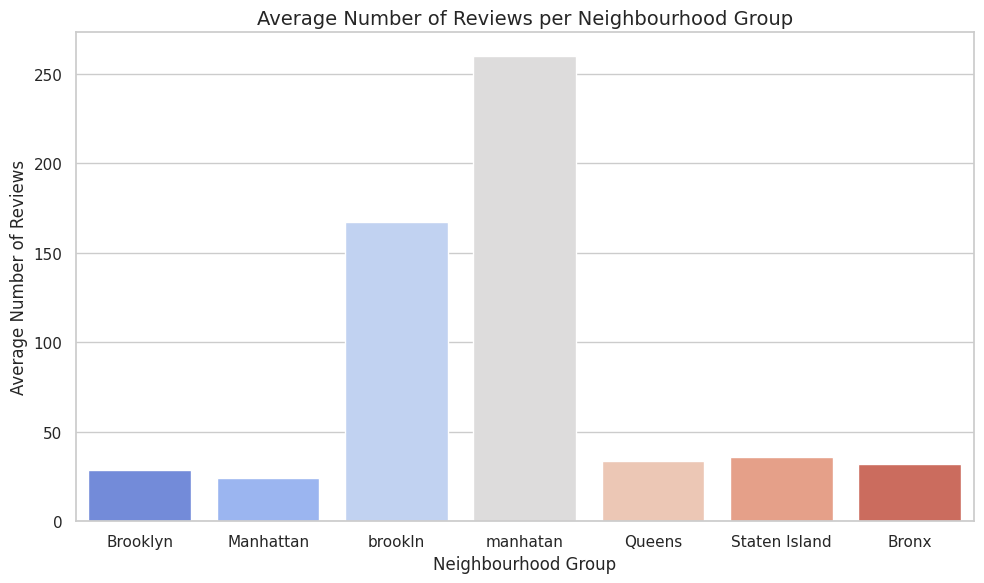

In [52]:
# ==============================================
# Q9. Number of Reviews by Neighbourhood Group
# ==============================================
plt.figure()
sns.barplot(data=df, x='neighbourhood_group', y='number_of_reviews', estimator='mean', ci=None, palette="coolwarm")
plt.title("Average Number of Reviews per Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Average Number of Reviews")
plt.tight_layout()
plt.savefig("plots/q9_reviews_by_neighbourhood.png", dpi=300, bbox_inches='tight')
plt.show()

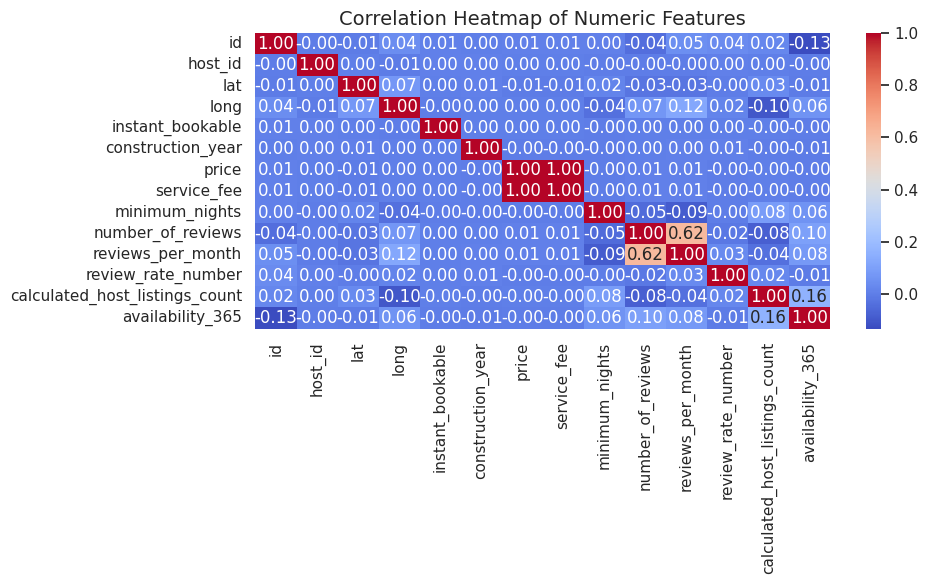

✅ All 10 Seaborn visualizations saved in 'plots/' folder successfully!


In [53]:
# ==============================================
# Q10. Correlation Heatmap for Numeric Columns
# ==============================================
plt.figure()
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.savefig("plots/q10_correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

print("✅ All 10 Seaborn visualizations saved in 'plots/' folder successfully!")